# HR Analytics - Job Change of Data Scientists

<ol>
    <li> 
        <a href="#understanding_data"> Understanding Data </a> 
        <ul style="list-style: none;">
            <li> 
                1.1<a href="#city"> City </a> 
            </li>
            <li> 
                1.2<a href="#cdi"> City Development Index </a> 
            </li>
            <li> 
                1.3<a href="#gender"> Gender </a> 
            </li>
            <li> 
                1.4<a href="#relevant_exp"> Relevant Experience </a> 
            </li>
            <li> 
                1.5<a href="#enrrolled_univ"> Enrolled University </a> 
            </li>
            <li> 
                1.6<a href="#education_level"> Education Level </a> 
            </li>
            <li> 
                1.7<a href="#major_discipline"> Major Discipline </a> 
            </li>
            <li> 
                1.8<a href="#experience"> Experience </a> 
            </li>
            <li> 
                1.9<a href="#company_size"> Company Size </a> 
            </li>
            <li> 
                1.10<a href="#company_type"> Company Type </a> 
            </li>
            <li> 
                1.11<a href="#last_new_job"> Last New Job </a> 
            </li>
            <li> 
                1.12<a href="#training_hours"> Training Hours </a> 
            </li>
            <li> 
                1.13<a href="#target"> Target </a> 
            </li>
            <li> 
                <a href="#overview"> Overview </a> 
            </li>
        </ul>
    </li>
    <li>
        <a href="#statistical_inferences"> Statistical Inferences</a>
        <ul style="list-style: none;">
            <li>
                2.1 <a href="#q1"> Correlation between variables and job change </a>
                <ul style="list-style: none;">
                    <li> 
                        2.1.1 <a href="#corr_cdi">Correlation City Development Index </a>
                    </li>
                    <li> 
                        2.1.2 <a href="#corr_training_hours">Correlation Training Hours </a>
                    </li>
                </ul>
            </li>
            <li> 
                2.2<a href="#hypothesis_one"> Hypothesis One </a> 
                <ul style="list-style: none;"> 
                    <li>
                        2.2.1<a href="#hypothesis_one_result"> Interpreting Hypothesis One Results </a> 
                    </li>
                </ul>
            </li>
            <li> 
                2.3<a href="#hypothesis_two"> Hypothesis Two </a> 
                <ul style="list-style: none;"> 
                    <li>
                        2.3.1<a href="#hypothesis_two_result"> Hypothesis Two Results </a> 
                    </li>
                </ul>
            </li>
        </ul>
    </li>
    <li>
        <a href="#encoding"> Encoding Features</a>
    </li>
    <li>
        <a href="#training_models"> Training Models</a>
        <ul style="list-style: none;">
            <li>
                4.1 <a href="#logistic_regression"> Logistic Regression </a>
            </li>
            <li>
                4.2 <a href="#ann"> Neural Network </a>
                <ul style="list-style: none;">
                    <li>4.2.1 
                        <a href="#fc_ann_ohl">Fully Connected Artificial Neural Network One Hidden Layer</a>
                    </li>
                    <li>4.2.2 
                        <a href="#fc_ann_thl">Fully Connected Artificial Neural Network Two Hidden Layer</a>
                    </li>
                    <li>4.2.3 
                        <a href="#ann_ohl">Artificial Neural Network One Hidden Layer (not fully connected)</a>
                    </li>
                    <li>4.2.4 
                        <a href="#ann_thl">Artificial Neural Network Two Hidden Layer (not fully connected)</a>
                    </li>
                    <li>4.2.5 
                        <a href="#ann_thl_d">Artificial Neural Network Two Hidden Layer with Dropout</a>
                    </li>
                </ul>
            </li>
            <li>
                4.3 <a href="#tree"> Tree Classifier </a>
            </li>
        </ul>
    </li>
    <li> 
        <a href="#unseen_data"> Loading Unseen Data </a>
    </li>
</ol>

[//]: # "cell intentionally left blank."

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import joblib

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import keras
from keras import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

### Useful variables

In [2]:
colors = sns.color_palette()
cv_five = 5
cv_ten = 10

### Reading the [dataset](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists) (training)

In [3]:
df_train = pd.read_csv("./datasets/aug_train.csv")
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df_train.shape

(19158, 14)

<a id="understanding_data"> </a>

# 1. Understanding Data

In [5]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


<a id="city"> </a>

### 1.1 City

In [6]:
df_train["city"].isna().any()

False

In [7]:
value_counts = df_train["city"].value_counts()
value_counts

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_121       3
city_129       3
city_111       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

#### The 5 most recurrents cities where candidates lives

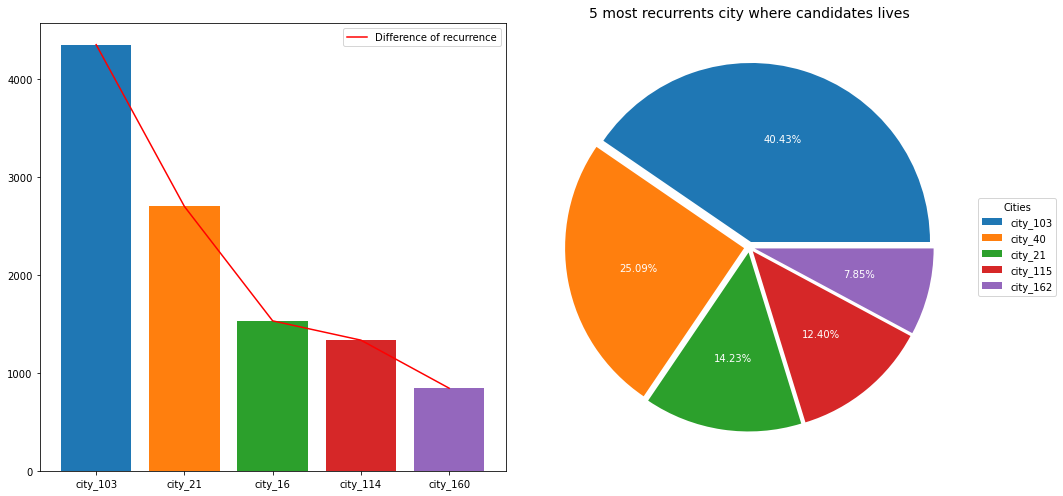

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))
five_cities_count = value_counts[:5]
five_cities_labels = df_train["city"][:5]

ax1.bar(height=five_cities_count, x=five_cities_labels, color=colors)
five_cities_count.plot(ax=ax1, color="red", label="Difference of recurrence")
ax1.legend()

wedges, texts, autotexts = ax2.pie(x=five_cities_count, autopct='%1.2f%%', textprops=dict(color="w"), explode=[0.03]*5)
ax2.legend(wedges, five_cities_labels,
          title="Cities",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("5 most recurrents city where candidates lives", fontsize=14)
plt.tight_layout()

As we can see, there are some cities that are highly more recurrent than others. In example, the first city (city_103) is more than 4 times recurrent than the fifth city (city_160)

<a id="cdi"></a>

### 1.2 City Development Index

In [9]:
df_train["city_development_index"].isna().any()

False

Text(0.5, 1.0, 'City Development Index Distribution')

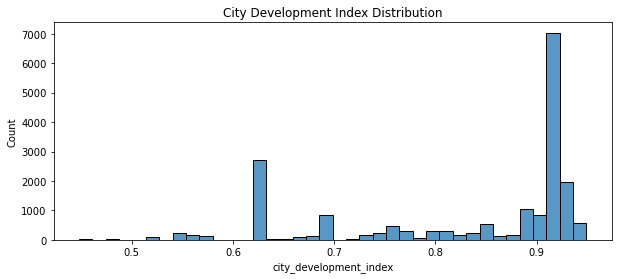

In [10]:
plt.figure(figsize=(10,4))
sns.histplot(df_train["city_development_index"])
plt.title("City Development Index Distribution")

Text(0.5, 1.0, 'City Development Index Distribution')

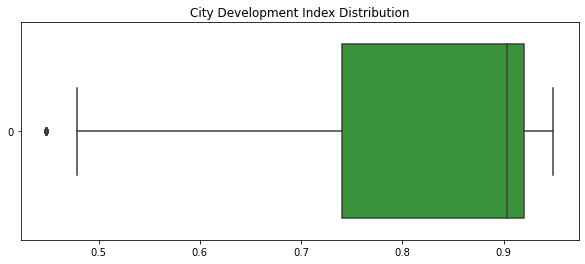

In [11]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_train["city_development_index"], orient="h", color=colors[2])
plt.title("City Development Index Distribution")

The city developmente index distribution has not a defined shape. Is not a normal distribution and have some notable peaks in ~0.6 and a higher one in ~0.9. Also, some outliers are seen telling us  that are some cities which are very underdeveloped. But more of the cities fall in > 0.5, meaning that are relativily developed.

In [12]:
min_dev_idx = df_train["city_development_index"].min()
max_dev_idx = df_train["city_development_index"].max()
print("The cities with less development index ({}) are = {}".format(min_dev_idx, df_train[df_train["city_development_index"] == min_dev_idx].shape[0]))
print("The cities with the highest development index ({}) are = {}".format(max_dev_idx, df_train[df_train["city_development_index"] == max_dev_idx].shape[0]))

The cities with less development index (0.448) are = 17
The cities with the highest development index (0.949) are = 79


The numbers above tell us (again) that are more developed cities than undeveloped

#### The 5 most recurrents cities and the index development

We are gonna analyze the city development index of the 5 most recurrents cities where the candidates lives in 

In [13]:
five_cities_names = five_cities_count.index.values
five_cities_df = df_train[df_train["city"].isin(five_cities_names)]
five_cities_df.shape

(10771, 14)

Text(0.5, 1.0, "Index development distribution of the 5 most 'famous' cities within candidates")

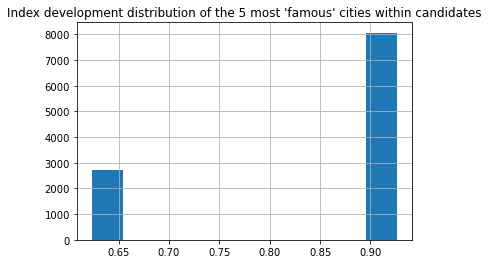

In [14]:
five_cities_df["city_development_index"].hist()
plt.title("Index development distribution of the 5 most 'famous' cities within candidates")

<a id="gender"></a>

### 1.3 Gender

In [15]:
df_train["gender"].isna().any()

True

In [16]:
df_train[df_train["gender"].isna()].shape[0]

4508

There are 4508 NaN values in the gender, for this case cause there are a lot of missing values, we are gonna consider them as unknown values

Text(0.5, 1.0, 'Pie of gender percentage')

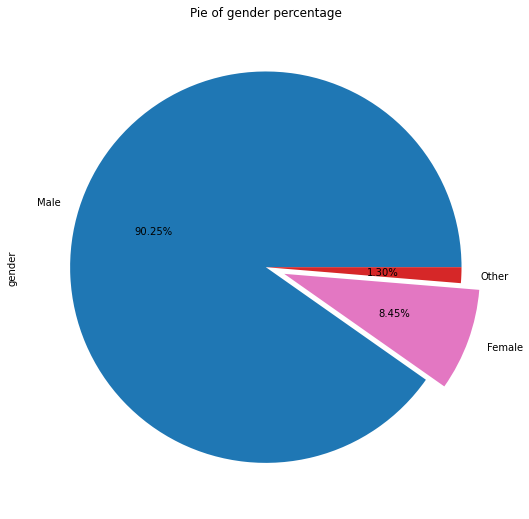

In [17]:
df_train["gender"].value_counts().plot(kind="pie", colors=[colors[0], colors[6], colors[3]], autopct='%1.2f%%', figsize=(9,9), explode=[0, 0.1,0])
plt.title("Pie of gender percentage")

The difference between gender is notable. 90% of the candidates are males and just a 9% (aprox) are females

<a id="relevant_exp"></a>

### 1.4 Relevant Experience

In [18]:
relevant_exp = df_train["relevent_experience"]

In [19]:
relevant_exp.isna().any()

False

In [20]:
relevant_exp.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [21]:
relevant_exp.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

As we can see, there are more candidates with a strongly previous experience than the ones that does not have experience

Text(0.5, 1.0, 'Candidates with experience vs without experience')

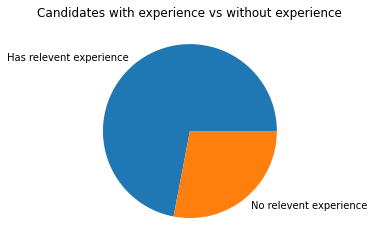

In [22]:
relevant_exp.value_counts().plot(kind="pie", colors=colors)
plt.ylabel("")
plt.title("Candidates with experience vs without experience")

<a id="enrrolled_univ"> </a>

### 1.5 Enrrolled University

In [23]:
enrrolled_univ = df_train["enrolled_university"]
enrrolled_univ.isna().value_counts()

False    18772
True       386
Name: enrolled_university, dtype: int64

In [24]:
enrrolled_univ.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

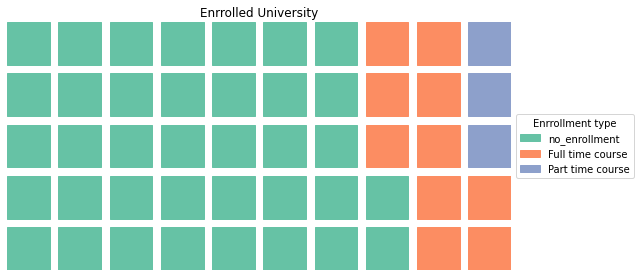

In [25]:
d = enrrolled_univ.value_counts()
d_la = d.index.values

fig = plt.figure(
    FigureClass=Waffle,
    rows=5, 
    columns=10,
    values=d,
    figsize=(9, 7),
    labels=list(d_la),
    legend={'loc': 'center left', "bbox_to_anchor":(1, 0, 0.5, 1), "title": "Enrrollment type"}
)
plt.title("Enrrolled University")
plt.show()

The avobe waffle chart tell us that most of the candidates aren't enrolled in any university, and the ones that they are, mostly are in a full time course instead than a part time

<a id="education_level"></a>

### 1.6 Education Level

In [26]:
ed_lvl = df_train["education_level"]
ed_lvl.isna().any()

True

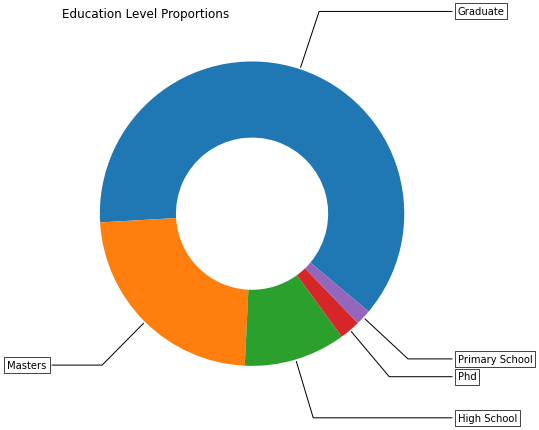

In [27]:
fig, ax = plt.subplots(figsize=(15, 7), subplot_kw=dict(aspect="equal"))

recipe = ed_lvl.dropna().unique()

data = ed_lvl.value_counts()

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Education Level Proportions", loc="left")

plt.show()

The above donought tell us that the majority of candidates are graduateds, but there is a big number of candidates which have a master degree. Also, few candidates didn't go to high school and others have a PHd

<a id="major_discipline"></a>

### 1.7 Major discipline

Let's watch which field of study is the most common between candidates. Probably the scientific one is the most frequently.

In [28]:
major_dis = df_train["major_discipline"]
major_dis.unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

Text(0.5, 1.0, 'Major Discipline')

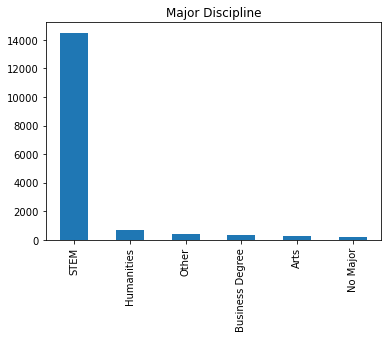

In [29]:
major_dis.value_counts().plot(kind="bar")
plt.title("Major Discipline")

As predicted, STEM (Science, technology, engineering, and mathematics) is the major field where most of candidates studied

<a id="experience"></a>

### 1.8 Experience

Visualizing the bins of the years of experience we are gonna understand the peaks in experience within candidates.

Text(0, 0.5, 'N° Candidates')

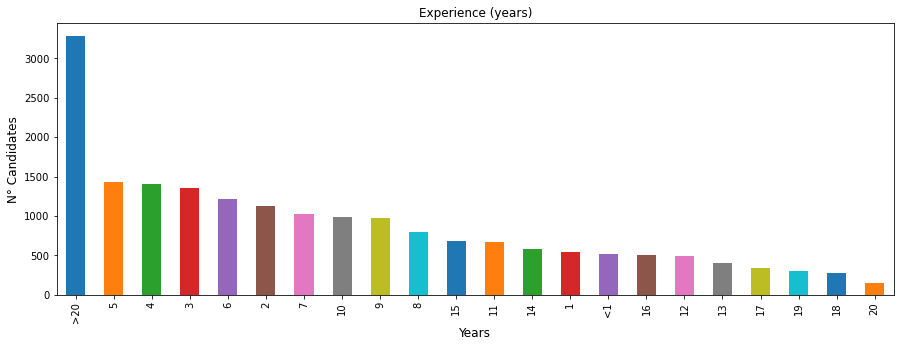

In [30]:
df_train["experience"].value_counts().plot(kind="bar", color=colors, figsize=(15,5))
plt.title("Experience (years)")
plt.xlabel("Years", fontsize=12)
plt.ylabel("N° Candidates", fontsize=12)

As we see, most candidates have a long experience of more than 20 years.

<a id="company_size"></a>

### 1.9 Company size

In [31]:
df_train["company_size"].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

Text(0.5, 1.0, 'Company Size')

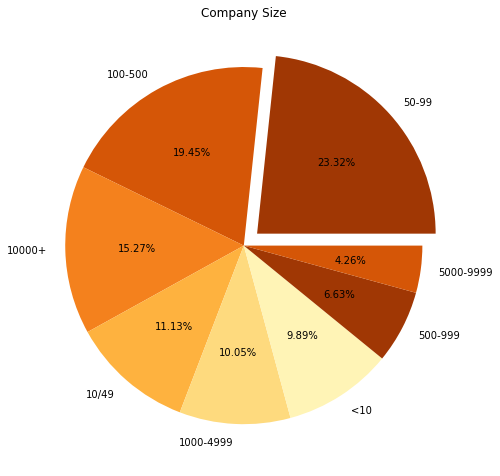

In [32]:
df_train["company_size"].value_counts().plot(kind="pie", figsize=(8,9), colors=sns.color_palette("YlOrBr_r"), explode=[0.1] + [0]*7, autopct="%1.2f%%")
plt.ylabel("")
plt.title("Company Size")

As we see above, there are not big difference in the quantity of candidates which actually work in companies of 50-99, 100-500 or more than 10000 employees.

<a id="company_type"></a>

### 1.10 Company Type

Text(0.5, 1.0, 'Company type')

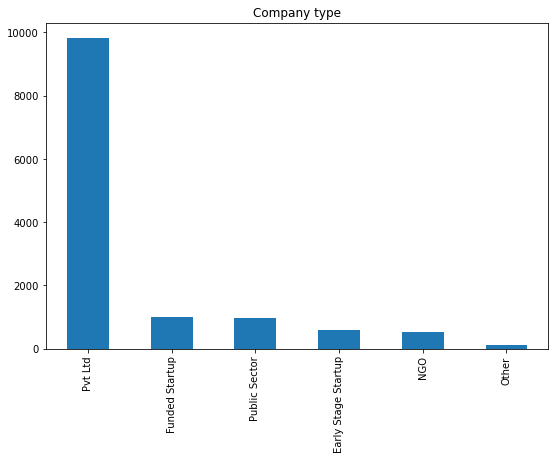

In [33]:
df_train["company_type"].value_counts().plot(kind="bar", figsize=(9,6))
plt.title("Company type")

Most companies where candidates work are Private limited company (Pvt Ltd)

<a id="last_new_job"></a>

### 1.11 Last New Job

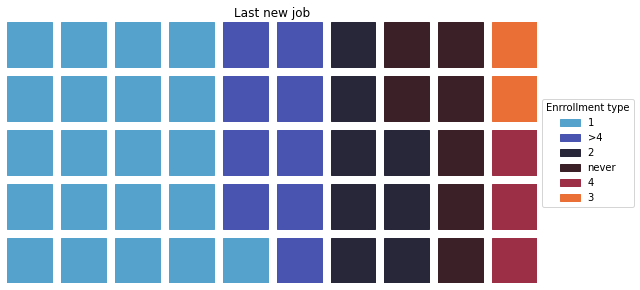

In [34]:
d = df_train["last_new_job"].value_counts()
d_la = d.index.values

fig = plt.figure(
    FigureClass=Waffle,
    rows=5, 
    columns=10,
    values=d,
    figsize=(9, 7),
    labels=list(d_la),
    colors=sns.color_palette("icefire"),
    legend={'loc': 'center left', "bbox_to_anchor":(1, 0, 0.5, 1), "title": "Enrrollment type"},
    block_arranging_style="new-line"
)
plt.title("Last new job")
plt.show()

Most candidates have only around 1 year working in their current job.

<a id="training_hours"></a>

### 1.12 Training hours

We are gonna to understand the distribution of the hours that the candidates trained

In [35]:
train_hours = df_train["training_hours"]
train_hours.head()

0    36
1    47
2    83
3    52
4     8
Name: training_hours, dtype: int64

Text(0.5, 1.0, 'Hours training distribution')

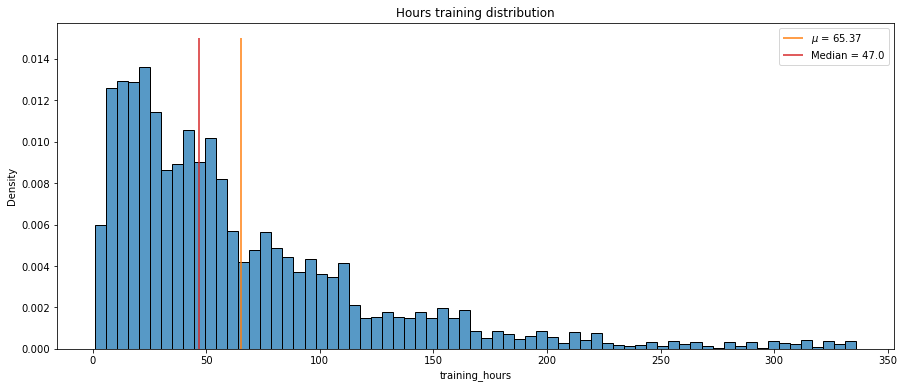

In [36]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(train_hours, color=colors[0], stat='density')
plt.vlines(x=train_hours.mean(), ymin=0, ymax=0.015, color=colors[1], label=r"$\mu$ = {}".format(np.round(train_hours.mean(), 2)))
plt.vlines(x=train_hours.median(), ymin=0, ymax=0.015, color=colors[3], label=r"Median = {}".format(np.round(train_hours.median(), 2)))
plt.legend()
plt.title("Hours training distribution")

The above histogram tell us that most candidates did around 25-50 hours of training, however there are some candidates which did almost 350 hours and that is the cause that why the mean is greater than 60. The above chart is a non-normal distribution, with a peak in around 25 hours and a huge right skew, telling us that are some candidates that did a lot more ours than the average.

Text(0.5, 1.0, 'Training hours distribution - Boxplot')

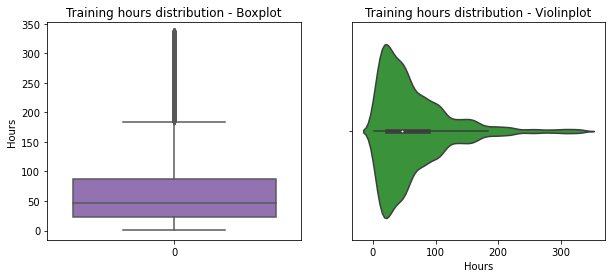

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
sns.violinplot(x=train_hours, ax=ax2, color=colors[2])
sns.boxplot(data=train_hours, ax=ax1, color=colors[4])

ax2.set_title("Training hours distribution - Violinplot")
ax2.set_xlabel("Hours")
ax1.set_ylabel("Hours")
ax1.set_title("Training hours distribution - Boxplot")

<a id="target"></a>

### 1.13 Target

In [38]:
df_train.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

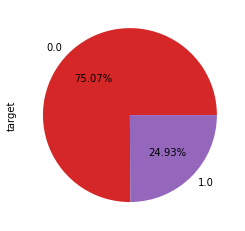

In [39]:
df_train.target.value_counts().plot(kind="pie", colors=colors[3:5], autopct="%1.2f%%")

<a id="overview"></a>

### Overview

We already analized each variable in our dataset, so at this point we know a lot about the candidates. We are gonna make a overview about the data of them. 

We have a dataset of 19158 candidates. More than a half of these candidates (10771) are living in just five differents **cities**, where city_103 is the most popular one. The majority of cities where they live have a **development index** between 0.6 and 0.9, and most of them fall in the extrems.
The stratification of **gender** is notable, where ~90% of the candidates are males and just a ~9% females. 13792 of the data scientists in the whole dataset have **relevant experience**, meaning that approximatly %28 of the samples does not have relevant experience, and %72 does. As **university enrrolment** we can notice that 72% are not enrolled, when almost the 20% are enrolled in a full time course and only a 6% in a part time course. Six parts of the entire dataset have a **education level** of graduate, another 2 parts are masters, 1 entire part belongs to high school level and the rest corresponds to Phd or primary school. The **major discipline** of the data scientist is mostly STEM, but there are a few which belongs to humanities. As we saw before, most professionals in the dataset have a relevant experience, that's why the majority of them have more than 3 years of **experience** working. The current **company size** of the samples are mostly 50-99, 100-500 or +10000, and these companies are mostly Pvt Ltd. Finally, candidates have a median of 47 **hours of training**. The reason why measuring with the median instead of the mean is because are some candidates that did a lot more hours (around 350), so the mean is affected by outliers.

<a id="statistical_inferences"></a>

# 2. Statistical inferences

At this point we know very well the individual variables, then we are gonna start analyzing them by groups instead of individually

<a id="q1"></a>

### 2.1 Correlation between variables and job change

In [40]:
def get_correlation(variable, hue=None, alpha=0.8):
    corr = df_train[["target", variable]].corr().loc[variable, :][0]
    sns.scatterplot(x="targetx", y=variable, hue=hue, data=df_train, alpha=alpha)
    plt.xlabel("Job Change")
    plt.title("Correlation between Job Change and {}".format(" ".join(variable.split("_"))))
    plt.text(.4,.5, "p = {}".format(np.round(corr,2)))
    plt.show()

In [41]:
df_train["targetx"] = df_train["target"].replace({1.0: "Yes", 0.0: "No"})
df_train["targetx"].head()

0    Yes
1     No
2     No
3    Yes
4     No
Name: targetx, dtype: object

<a id="corr_cdi"></a>

#### 2.1.1 Correlation City Development Index

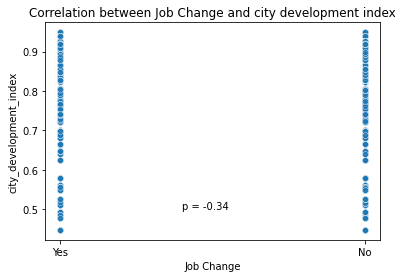

In [42]:
get_correlation("city_development_index")

It appears to be a weak negative correlation between the city development index with want to change the job. Usually, a correlation value less than 0.5 is consider as not significant, so we are gonna consider that there is no significant impact between the city development index in relation with the job change.

<a id="corr_training_hours"></a>

#### 2.1.2 Correlation Training Hours

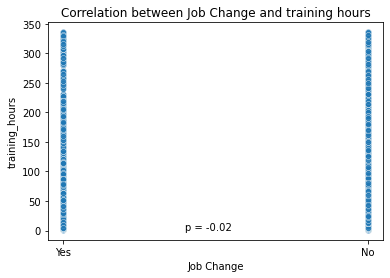

In [43]:
get_correlation("training_hours")

There is not correlation at all between the training hours that data scientist gave to the courses with want change the job.

<a id="hypothesis_one"></a>

### 2.2 Hypothesis one:

Proportionally speaking, females candidates have more relevant experience than males candidates.

[//]:# ""

To test the first hypothesis what we are gonna do is make an interval confidence where comparing the proportions of males who has relevant experience, with the females. Then, we have to make some assumptions:

- We have a "large enough" samples, giving a normal distribution
- The samples are random picked


"A large enough sample" means that we have a normal distribution, where the males samples are approximatly equal to the female ones.

First things first, the following step is find the optimal sample size, given by:

<center><img src="./images/sample_size.png" /></center>

In [44]:
z = 1.96
# margin of error
moe = 0.03
sample_size = int(np.ceil(z**2 / (moe**2 * 4)))
sample_size

1068

As we see, 1068 is the correct sample size to get a 95% confidence interval with a margin of error = 0.03.

Next: pick random samples from our initial dataset

In [45]:
female_sample = np.random.choice(df_train[df_train["gender"] == "Female"].relevent_experience, size=sample_size)
male_sample = np.random.choice(df_train[df_train["gender"] == "Male"].relevent_experience, size=sample_size)
len(female_sample), len(male_sample)

(1068, 1068)

Getting the count of values of each gender and the respective frequency of relevent experience 

In [46]:
unique_male, counts_male = np.unique(male_sample, return_counts=True)
unique_female, counts_female = np.unique(female_sample, return_counts=True)

print("Males data scientist with relevent experience are {} and without relevent experience {}".format(counts_male[0], counts_male[1]) )
print("Females data scientist with relevent experience are {} and without relevent experience {}".format(counts_female[0], counts_female[1]))

Males data scientist with relevent experience are 788 and without relevent experience 280
Females data scientist with relevent experience are 774 and without relevent experience 294


Converting the count of value into a percentage to next calculate the confidence interval with it

In [47]:
relevent_experience_male = counts_male[0]
relevent_experience_female = counts_female[0]

p_male = np.round(relevent_experience_male / sample_size,2)
p_female = np.round(relevent_experience_female / sample_size, 2)

print("Proportion males = {}".format(p_male))
print("Proportion females = {}".format(p_female))

Proportion males = 0.74
Proportion females = 0.72


In [48]:
def calculate_CI(p1, p2, z, sample_size1, sample_size2):
    best_estimate = p1 - p2
    error = np.sqrt(((p1 * (1-p1))/sample_size1) +  ((p2 * (1-p2))/sample_size2))
    
    x1 = best_estimate - z * error
    x2 = best_estimate + z * error
    
    return (x1,x2)

Calculating...

In [49]:
calculate_CI(p_female, p_male, z, sample_size, sample_size)

(-0.057645975557228314, 0.01764597555722828)

Text(0.5, 1.0, 'Relevent experience of sample of 1068 males-females')

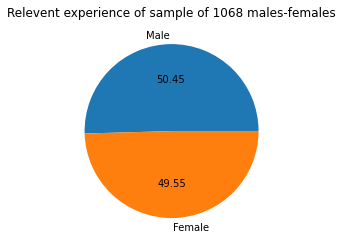

In [50]:
plt.pie([counts_male[0], counts_female[0]], labels=["Male", "Female"], autopct="%.2f")
plt.title("Relevent experience of sample of 1068 males-females")

<a id="hypothesis_one_result"></a>

#### 2.2.1 Interpreting hypothesis one results

With 95% of confidence we can say that female data scientist don't have more experience than male ones. This is because the confidence interval is (-0.057, 0.017).

<a id="hypothesis_two"> </a>

### 2.3 Hypothesis two

Experience impact in the decission of change the actual job

Expressing the hypothesis mathematically

- h0: p1 - p2 != 0
- ha: p1 - p2 = 0

Where p1 is the proportion of observations with relevant experience, and p2 proportion of observarions without relevant experience.
**h0** corresponds to the null hypothesis, and **ha** to the alternative hypothesis

Also we have to define a **significance level**, which we are gonna set to α = 0.05

In [51]:
sig_level = 0.05

Now, we are gonna consider a 30 large random sample for people with relevant experience and 35 for those who don't have.

In [52]:
sample_size1 = 30
sample_size2 = 35
wining_seed = 2002072657
np.random.seed(wining_seed)
p1 = np.random.choice(df_train[df_train["relevent_experience"] == "Has relevent experience"].target, size=sample_size1)
p2 = np.random.choice(df_train[df_train["relevent_experience"] == "No relevent experience"].target, size=sample_size2)

And let's say that the sample to be "large enough" should contain at least 10 ones and others 10 zeros. To prove this, the following statements must be validated:

Given phat = (p1 + p2) / (n1 + n2)

p01 = phat * n1; p10 = n1 * (1 - phat)

p21 = phat * n2; p20 = n2 * (1 - phat)

**IF**...
p01 > 10 and p10 > 10 and p21 > 10 and p20 > 10 **--->** the samples are "large enough"

In [53]:
phat = (p1.sum() + p2.sum()) / (sample_size1 + sample_size2)

p01 = phat * sample_size1
p10 = sample_size1 * (1-phat)
p21 = phat * sample_size2
p20 = sample_size2 * (1-phat)

print("p01 = {}; Is greater than ten? {}".format(np.round(p01, 2), p01>10))
print("p10 = {}; Is greater than ten? {}".format(np.round(p10, 2), p10>10))
print("p21 = {}; Is greater than ten? {}".format(np.round(p21, 2), p21>10))
print("p20 = {}; Is greater than ten? {}".format(np.round(p20, 2), p20>10))

p01 = 10.15; Is greater than ten? True
p10 = 19.85; Is greater than ten? True
p21 = 11.85; Is greater than ten? True
p20 = 23.15; Is greater than ten? True


Then we have samples normally distributed.

The next step is calculate the best estimate:

In [54]:
p1_hat = p1.sum() / sample_size1
p2_hat = p2.sum() / sample_size2

best_estimate = abs(p1_hat - p2_hat)
best_estimate

0.2571428571428571

Now, with the best estimate we can compute the standard error and use it to calculate the test statistic. Our hypothesis is comparing to 0, so our estimate for the null hypothesis will be equal to zero.

In [55]:
# standard error
se = np.sqrt(best_estimate * (1-best_estimate)*((1/sample_size1) + (1/sample_size2)))

# null hypothesis
p0 = 0

# z-score
z = (best_estimate - p0) / se
z

2.3646809459906764

Having the z-score, the last step is calculate the p-value, which will be the value against the significance level. P-value will determine if we have to reject or fail to reject the null hypothesis.

If p-value > α, then we fail to reject the null hypothesis.
Otherwise, we are gonna reject h0.

In [56]:
# calculate p-value
p_value = scipy.stats.norm.sf(abs(z))*2

print("p-value = {}, and α = {}. Is p-value > α? {}".format(np.round(p_value,2),sig_level, p_value>sig_level))

p-value = 0.02, and α = 0.05. Is p-value > α? False


<a id="hypothesis_two_result"></a>

#### 2.3.1 Hypothesis two results

We reject the null hypothesis, having a p-value smaller than our previously depicted significance level. There is no evidence that experience have a influence in want to change the job

<a id="encoding"> </a>

## 3. Encoding Features

Most of the features that we have are categorical, so we need them as type numeric with the purpose of pass them to the training model.

In [57]:
columns_to_dummy = ['gender', 'relevent_experience', 'enrolled_university', 'education_level',
                   'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

dummies_df = pd.get_dummies(df_train[columns_to_dummy])
dummies_df.head()

,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


To train the model, we are gonna use the dummies features previously encoded and plus the city development index with the training hours.

In [58]:
features_to_std = ["city_development_index", "training_hours"]
std_features = pd.DataFrame(StandardScaler().fit_transform(df_train[features_to_std]), columns=features_to_std)
X = pd.concat([std_features, dummies_df], axis=1)
Y = df_train.target
X.head()

,city_development_index,training_hours,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.738919,-0.488985,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,-0.428410,-0.305825,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,-1.660590,0.293607,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.323026,-0.222571,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,-0.501368,-0.955209,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Separating into train data and validation one:

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.3, random_state=42)

<a id="training_models"></a>

# 4. Training Models

In this section, we are gonna implement machine learning models having in mind the objective of this notebook: predict the probability of a data scientist looking for a new job. To achieve this purpose, we have to use classification models.

<a id="logistic_regression"></a>

## 4.1 Logistic Regression 

The first model we are gonna train and inspect the metrics it returns is a classic logistic regression provided by Sklearn package. 

In [60]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)

In [61]:
lr_accuracy = metrics.accuracy_score(lr_predictions, y_test)
lr_accuracy

0.7686151704940849

Text(0.5, 1.0, 'Confusion Matrix for Linear Regression')

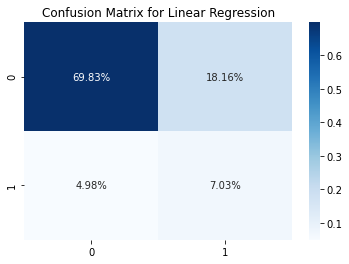

In [62]:
lr_cf_matrix = metrics.confusion_matrix(lr_predictions, y_test)
sns.heatmap(lr_cf_matrix/np.sum(lr_cf_matrix), annot=True, fmt='.2%', cmap='Blues')
plt.title("Confusion Matrix for Linear Regression")

In [63]:
print(metrics.classification_report(y_test, 
                                    lr_predictions, 
                                    target_names=["Not looking for a new job","Looking for a new job"]))

                           precision    recall  f1-score   support

Not looking for a new job       0.79      0.93      0.86      4300
    Looking for a new job       0.59      0.28      0.38      1448

                 accuracy                           0.77      5748
                macro avg       0.69      0.61      0.62      5748
             weighted avg       0.74      0.77      0.74      5748



In [64]:
lr_filename = "models/logistic_regression-{}.sav".format(lr_accuracy)
joblib.dump(lr, lr_filename)

['models/logistic_regression-0.7686151704940849.sav']

<a id="ann"></a>

## 4.2 Neural Network

In this sub-section we will train different neural network with different specifications. Will vary the number of layers and nodes, but we are gonna keep the same parameters such as the optimizer and the loss function. Finally we will compare the results and metrics of the differents neural networks and save the best option.

[//]:# ""

The functionallity of the below function is train the neural network. StratifiedKFold allow us to split the dataset into k number of folds (in this case we are gonna use k=10). Then we define the estimator that we have to create a KerasClassifier instance because it allow us to use keras model with scikit learn functionalities.
Then we pass the previously created estimator and the kfolds to a cross validation score, which will return an array with the scores of the neural network

In [65]:
n_cols = X.shape[1]
def train_neural_network(ann, name=""):
    metrics = {
        "test_loss": [],
        "test_acc": [],
        "train_loss": [],
        "train_acc": [],
        "val_loss": [],
        "val_acc": []
    }
    

    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.3, random_state=42)

    # saving some samples for validation
    X_val = X_train[-3410:]
    X_train = X_train[:-3410]
    y_val = y_train[-3410:]
    y_train = y_train[:-3410]

    model = ann()
    history = model.fit(
                X_train,
                y_train,
                batch_size=64,
                epochs=100,
                validation_data=(X_val, y_val),
                verbose=0
            )

    test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    # saving metrics
    metrics["test_loss"].append(test_loss)
    metrics["test_acc"].append(test_accuracy)
    metrics["train_loss"].append(history.history["loss"][0])
    metrics["train_acc"].append(history.history["accuracy"][0])
    metrics["val_loss"].append(history.history["val_loss"][0])
    metrics["val_acc"].append(history.history["val_accuracy"][0])
    
    # plotting accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # plotting loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    filename = "models/{}-{}.sav".format(name, test_accuracy)
    model.save(filename)
        
    return (model, pd.DataFrame(metrics))

<a id="fc_ann_ohl"></a>

### 4.2.1 Fully Connected Artificial Neural Network One Hidden Layer

The first neural network to train is a fully connected one with only one hidden layer. We also use the binary cross entropy loss-measurment, which is the preferred **loss function** for binary classification problems. We set adam as **optimizer** algorithm for gradient descent and finally, the **accuracy** metric will be collected during the training.

In [66]:
# Fully Connected Artificial Neural Network One Hidden Layer
def fc_ann_ohl():

    model = Sequential()
    model.add(Dense(n_cols, activation="relu", input_shape=(n_cols,)))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

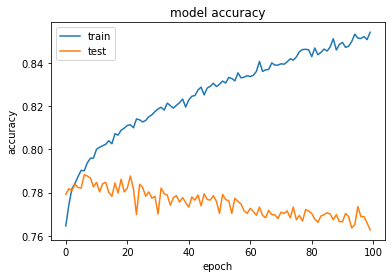

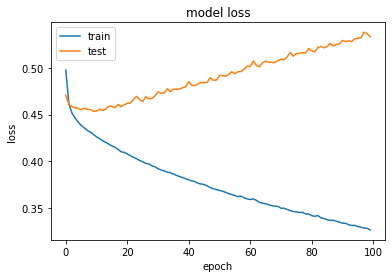

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/fc_ann_ohl-0.7599164843559265.sav/assets


In [67]:
(ann1, ann1_metrics) = train_neural_network(fc_ann_ohl, "fc_ann_ohl")

In [68]:
ann1_metrics

,test_loss,test_acc,train_loss,train_acc,val_loss,val_acc
0,0.542042,0.759916,0.497672,0.7646,0.470597,0.779179


As we can see, the results of a fully connected network with only one hidden layer it's an overfitted model because the training accuracy still growing meanwhile the test accuracy decrease

<a id="fc_ann_thl"></a>

### 4.2.2 Fully Connected Artificial Neural Network Two Hidden Layer

The second neural network to train is a fully connected one with two hidden layers. So, the first layer will have as units the number of features (63) and the second one will have 31 neurons

In [69]:
# Fully Connected Artificial Neural Network Two Hidden Layer
def fc_ann_thl():
    model = Sequential()
    model.add(Dense(n_cols, activation="relu", input_shape=(n_cols,)))
    model.add(Dense(31, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

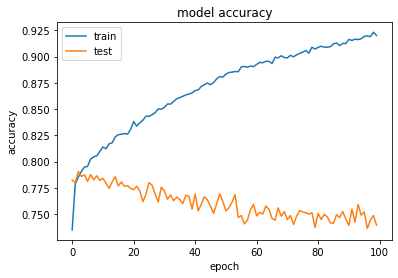

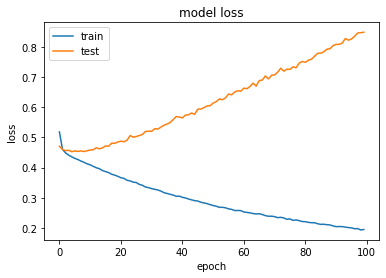

INFO:tensorflow:Assets written to: models/fc_ann_thl-0.7282533049583435.sav/assets


In [70]:
(ann2, ann2_metrics) = train_neural_network(fc_ann_thl, "fc_ann_thl")

In [71]:
ann2_metrics

,test_loss,test_acc,train_loss,train_acc,val_loss,val_acc
0,0.897604,0.728253,0.518509,0.735,0.470545,0.782405


As same of the first neural network, this one with two hidden layers also is an overfitted model

<a id="ann_ohl"></a>

### 4.2.3 Artificial Neural Network One Hidden Layer (not fully connected)

The third neural network has only one hidden layer and is not fully connected because this layer just has 30 units (almost the half of the input shape). This will put pressure on the network during training to pick out the most important structure in the input data to model.

In [72]:
# Artificial Neural Network One Hidden Layer (not fully connected)
def ann_ohl():
    model = Sequential()
    model.add(Dense(31, activation="relu", input_shape=(n_cols,)))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

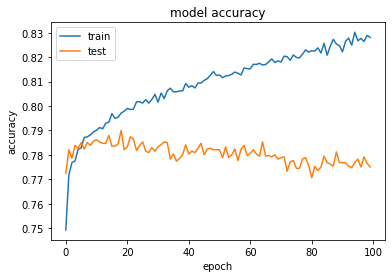

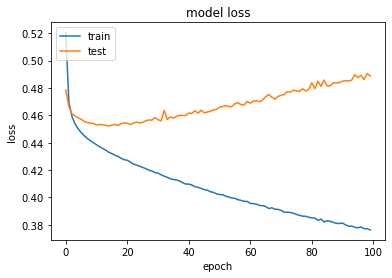

INFO:tensorflow:Assets written to: models/ann_ohl-0.7663534879684448.sav/assets


In [73]:
(ann3, ann3_metrics) = train_neural_network(ann_ohl, "ann_ohl")

In [74]:
ann3_metrics

,test_loss,test_acc,train_loss,train_acc,val_loss,val_acc
0,0.508151,0.766353,0.520667,0.7493,0.478417,0.772434


With a single hidden layer and 31 neurons on it, we can notice a slightly improvement in relation with the previous models. However it still being an overfitted neural network and there are not the results which we are looking for.

<a id="ann_thl"></a>

### 4.2.4 Artificial Neural Network Two Hidden Layer (not fully connected)

The last neural network is the same than the third one but in this we aggregate another hidden layer of 15 units.

In [75]:
# Artificial Neural Network Two Hidden Layer (not fully connected)
def ann_thl():
    model = Sequential()
    model.add(Dense(31, activation="relu", input_shape=(n_cols,)))
    model.add(Dense(15, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

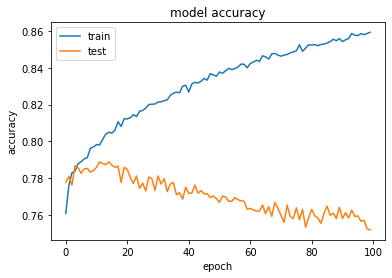

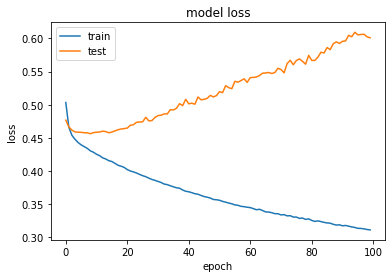

INFO:tensorflow:Assets written to: models/ann_thl-0.7456506490707397.sav/assets


In [76]:
(ann4, ann4_metrics) = train_neural_network(ann_thl, "ann_thl")

Adding another hidden layer to the previous model does not improve the metrics.

In [77]:
ann4_metrics

,test_loss,test_acc,train_loss,train_acc,val_loss,val_acc
0,0.645395,0.745651,0.503235,0.7609,0.476624,0.777713


<a id="ann_thl_d"> </a>

### 4.2.5 Artificial Neural Network with Dropout

In the previous models we observer that we had a overfitting problem. That's the reason beacause in this last neural network we are gonna add a dropout layer. A dropout layer "turn off" a number of neurons according a specific probability. We will set this probability to .4.

In [78]:
# Artificial Neural Network Two Hidden Layer with Dropout
def ann_thl_d():
    model = Sequential()
    model.add(Dense(10, activation="softmax", input_shape=(n_cols,)))
    model.add(Dense(10, activation="softmax"))
    model.add(Dropout(.4))
    model.add(Dense(1, activation="sigmoid"))
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.3, momentum=0.9)
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
    
    return model

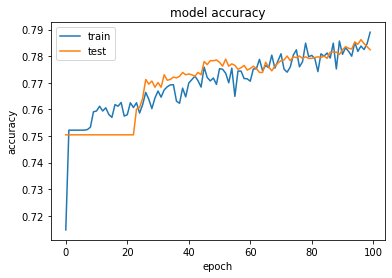

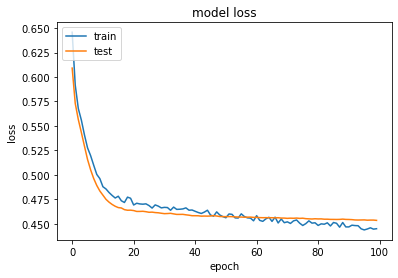

INFO:tensorflow:Assets written to: models/ann_thl_d-0.7719206809997559.sav/assets


In [79]:
(ann5, ann5_metrics) = train_neural_network(ann_thl_d, "ann_thl_d")

In [80]:
ann5_metrics

,test_loss,test_acc,train_loss,train_acc,val_loss,val_acc
0,0.465978,0.771921,0.645684,0.7147,0.609093,0.75044


Now we can observe a improvement in the learning process of our model.

<a id="tree"></a>

## 4.3 Tree Classifier

The fourth model we will train is a tree classifier provided by scikit learn package. We are gonna train it using two differents criterion algorithms: entropy and gini. The we will compare the accuracy of both models and we will save the best one.

First we define the models and fit them with training data

In [81]:
tree_entropy = DecisionTreeClassifier(criterion="entropy")
tree_entropy.fit(X_train,y_train)
tree_gini = DecisionTreeClassifier(criterion="gini")
tree_gini.fit(X_train,y_train)

DecisionTreeClassifier()

Now we measure the accuracy of the models

In [82]:
entropy_predictions = tree_entropy.predict(X_test)
entropy_accuracy = metrics.accuracy_score(entropy_predictions, y_test)
gini_predictions = tree_gini.predict(X_test)
gini_accuracy = metrics.accuracy_score(gini_predictions, y_test)

And finally, comparing the results between the two models

In [83]:
print("Solving the problem with entropy as criterion give us a mean accuracy of = %.2f%%" % entropy_accuracy)
print("Solving the problem with gini as criterion give us a mean accuracy of = %.2f%%" % gini_accuracy)

Solving the problem with entropy as criterion give us a mean accuracy of = 0.72%
Solving the problem with gini as criterion give us a mean accuracy of = 0.72%


As we can notice, solving the problem with gini criterion give us a slightly better accuracy than the entropy approach.

In [84]:
tree_filename = "models/tree-{}.sav".format(gini_accuracy)
joblib.dump(tree_gini, tree_filename)

['models/tree-0.721642310368824.sav']

<a id="unseen_data"></a>

# 5. Loading Unseen Data

This final section has the idea of test our models with unseen data

In [85]:
df = pd.read_csv("datasets/aug_test.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


As we see, this data does not have the target column.

In [86]:
df.shape

(2129, 13)

In [87]:
def extracting_features(df):
    columns_to_dummy = ['gender', 'relevent_experience', 'enrolled_university', 'education_level',
                   'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

    dummies_df = pd.get_dummies(df[columns_to_dummy])
    features_to_std = ["city_development_index", "training_hours"]
    std_features = pd.DataFrame(StandardScaler().fit_transform(df[features_to_std]), columns=features_to_std)
    X = pd.concat([std_features, dummies_df], axis=1)
    
    return X

In [88]:
X = extracting_features(df)
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [89]:
def compile_model(X, df, model, name, is_ann):
    prediction =  model.predict_classes(X) if is_ann else model.predict(X)
    probability = model.predict_proba(X) if is_ann else model.predict_proba(X)[:, 1]
    
    df["{}_proba".format(name)] = probability
    df["{}_prediction".format(name)] = prediction

In [90]:
compile_model(X, df, lr, "lr", False)
df.head().loc[:, "lr_proba":]

,lr_proba,lr_prediction
0,0.232790,0.0
1,0.248598,0.0
2,0.374901,0.0
3,0.192899,0.0
4,0.097170,0.0


In [91]:
compile_model(X, df, ann1, "ann1", True)
df.head().loc[:, "lr_proba":]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.


,lr_proba,lr_prediction,ann1_proba,ann1_prediction
0,0.232790,0.0,0.055971,0
1,0.248598,0.0,0.066403,0
2,0.374901,0.0,0.317752,0
3,0.192899,0.0,0.070699,0
4,0.097170,0.0,0.073236,0


In [92]:
compile_model(X, df, ann2, "ann2", True)
df.head().loc[:, "lr_proba":]

,lr_proba,lr_prediction,ann1_proba,ann1_prediction,ann2_proba,ann2_prediction
0,0.232790,0.0,0.055971,0,0.015358,0
1,0.248598,0.0,0.066403,0,0.002427,0
2,0.374901,0.0,0.317752,0,0.163171,0
3,0.192899,0.0,0.070699,0,0.000979,0
4,0.097170,0.0,0.073236,0,0.256165,0


In [93]:
compile_model(X, df, ann3, "ann3", True)
df.head().loc[:, "lr_proba":]

,lr_proba,lr_prediction,ann1_proba,ann1_prediction,ann2_proba,ann2_prediction,ann3_proba,ann3_prediction
0,0.232790,0.0,0.055971,0,0.015358,0,0.160744,0
1,0.248598,0.0,0.066403,0,0.002427,0,0.100713,0
2,0.374901,0.0,0.317752,0,0.163171,0,0.229806,0
3,0.192899,0.0,0.070699,0,0.000979,0,0.056118,0
4,0.097170,0.0,0.073236,0,0.256165,0,0.060446,0


In [94]:
compile_model(X, df, ann4, "ann4", True)
df.head().loc[:, "lr_proba":]

,lr_proba,lr_prediction,ann1_proba,ann1_prediction,ann2_proba,ann2_prediction,ann3_proba,ann3_prediction,ann4_proba,ann4_prediction
0,0.232790,0.0,0.055971,0,0.015358,0,0.160744,0,0.056704,0
1,0.248598,0.0,0.066403,0,0.002427,0,0.100713,0,0.018883,0
2,0.374901,0.0,0.317752,0,0.163171,0,0.229806,0,0.336855,0
3,0.192899,0.0,0.070699,0,0.000979,0,0.056118,0,0.016298,0
4,0.097170,0.0,0.073236,0,0.256165,0,0.060446,0,0.161595,0


In [95]:
compile_model(X, df, ann5, "ann5", True)
df.head().loc[:, "lr_proba":]

,lr_proba,lr_prediction,ann1_proba,ann1_prediction,ann2_proba,ann2_prediction,ann3_proba,ann3_prediction,ann4_proba,ann4_prediction,ann5_proba,ann5_prediction
0,0.232790,0.0,0.055971,0,0.015358,0,0.160744,0,0.056704,0,0.142054,0
1,0.248598,0.0,0.066403,0,0.002427,0,0.100713,0,0.018883,0,0.094695,0
2,0.374901,0.0,0.317752,0,0.163171,0,0.229806,0,0.336855,0,0.517741,1
3,0.192899,0.0,0.070699,0,0.000979,0,0.056118,0,0.016298,0,0.088935,0
4,0.097170,0.0,0.073236,0,0.256165,0,0.060446,0,0.161595,0,0.083168,0


In [96]:
compile_model(X, df, tree_gini, "tree", False)
df.head().loc[:, "lr_proba":]

,lr_proba,lr_prediction,ann1_proba,ann1_prediction,ann2_proba,ann2_prediction,ann3_proba,ann3_prediction,ann4_proba,ann4_prediction,ann5_proba,ann5_prediction,tree_proba,tree_prediction
0,0.232790,0.0,0.055971,0,0.015358,0,0.160744,0,0.056704,0,0.142054,0,0.0,0.0
1,0.248598,0.0,0.066403,0,0.002427,0,0.100713,0,0.018883,0,0.094695,0,0.0,0.0
2,0.374901,0.0,0.317752,0,0.163171,0,0.229806,0,0.336855,0,0.517741,1,1.0,1.0
3,0.192899,0.0,0.070699,0,0.000979,0,0.056118,0,0.016298,0,0.088935,0,0.0,0.0
4,0.097170,0.0,0.073236,0,0.256165,0,0.060446,0,0.161595,0,0.083168,0,0.0,0.0
